In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

df = pd.read_csv('/content/Retail_Customer_Insights (1).csv')

df.head()

,Customer_ID,Age,Annual_Income,Gender,Purchase_History,Product_Category,Customer_Satisfaction,Loyalty_Points,Marital_Status,Number_of_Children,Employment_Status,Credit_Score,Owns_House,Monthly_Expenditure,Internet_Usage_Hours_per_Week
0,CID770487,45,72633.53,Non-binary,0,Electronics,9.0,541.11,Divorced,1,Unemployed,664,False,2159.63,33
1,CID216739,38,61816.55,Non-binary,0,Books,6.0,497.41,Married,3,Unemployed,623,True,1439.88,10
2,CID126225,47,57338.15,Non-binary,0,Grocery,3.0,634.90,Single,1,Student,342,True,1786.38,51
3,CID877572,58,83800.37,Female,0,Furniture,4.0,505.82,Divorced,2,Employed,810,True,NaN,45
4,CID388389,37,64875.12,Male,0,Furniture,6.0,610.39,Single,1,Student,692,True,1235.51,-9223372036854775808


In [14]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1-kDI7NxPheMFzjDK2tE2ebXCoZRsCP1p1zdiJmjnA9Q#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [13]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Customer_ID                    100000 non-null  object 
 1   Age                            100000 non-null  int64  
 2   Annual_Income                  95000 non-null   float64
 3   Gender                         100000 non-null  object 
 4   Purchase_History               100000 non-null  int64  
 5   Product_Category               100000 non-null  object 
 6   Customer_Satisfaction          97000 non-null   float64
 7   Loyalty_Points                 98000 non-null   float64
 8   Marital_Status                 100000 non-null  object 
 9   Number_of_Children             100000 non-null  int64  
 10  Employment_Status              100000 non-null  object 
 11  Credit_Score                   100000 non-null  int64  
 12  Owns_House                     

In [16]:
# Check for missing values
print(df.isnull().sum()) # Changed 'data' to 'df'

# Summary statistics
print(df.describe(include='all')) # Changed 'data' to 'df'

Customer_ID                         0
Age                                 0
Annual_Income                    5000
Gender                              0
Purchase_History                    0
Product_Category                    0
Customer_Satisfaction            3000
Loyalty_Points                   2000
Marital_Status                      0
Number_of_Children                  0
Employment_Status                   0
Credit_Score                        0
Owns_House                          0
Monthly_Expenditure              5000
Internet_Usage_Hours_per_Week       0
dtype: int64
       Customer_ID           Age  Annual_Income  Gender  Purchase_History  \
count       100000  1.000000e+05   95000.000000  100000     100000.000000   
unique       94659           NaN            NaN       4               NaN   
top      CID881280           NaN            NaN  Female               NaN   
freq             4           NaN            NaN   25047               NaN   
mean           NaN -4.611686e+17

In [18]:
# Example: Forward fill missing values
df.fillna(method='ffill', inplace=True) # Changed 'data' to 'df'

<ipython-input-18-5261756dd234>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Changed 'data' to 'df'


In [8]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True) # Changed 'data' to 'df'

In [1]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('Purchase_History', axis=1) # Changed 'data' to 'df'
y = df['Purchase_History'] # Changed 'data' to 'df'

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'df' is not defined

In [11]:
# Separate features and target variable
X = df.drop(['A'], axis=1) # Changed 'data' to 'df' and dropped column 'A' instead
y = df['A'] # Changed 'data' to 'df' and assigned column 'A' as the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
# Summary statistics
print(df.describe())
# Changed 'data' to 'df' to refer to the DataFrame

         A
count  3.0
mean   2.0
std    1.0
min    1.0
25%    1.5
50%    2.0
75%    2.5
max    3.0


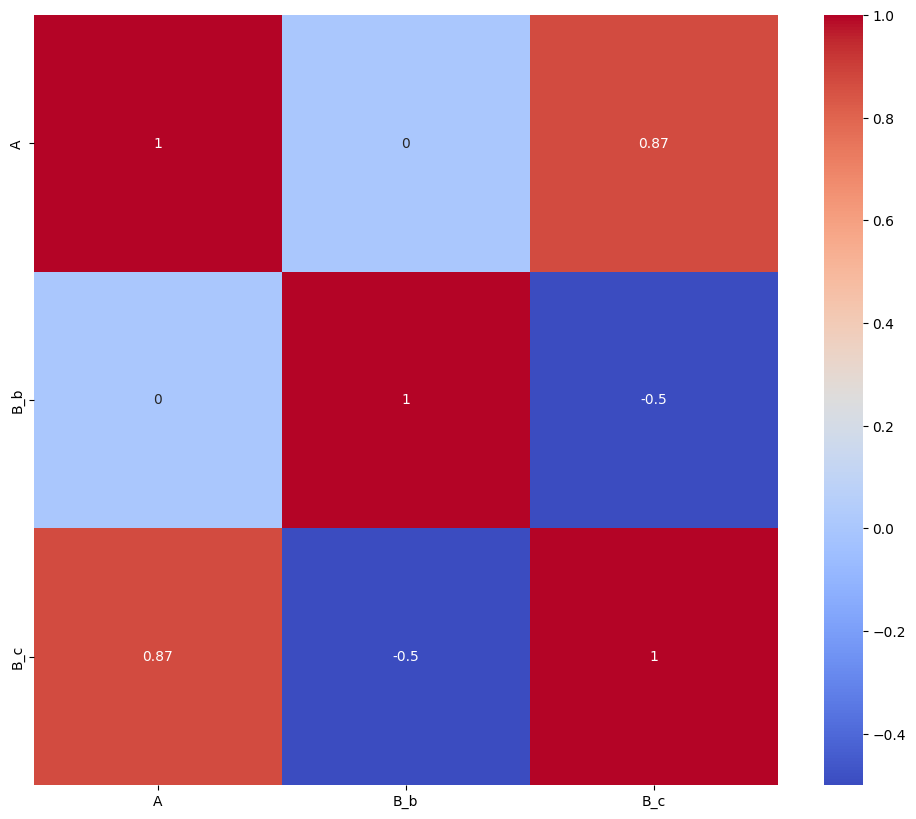

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df.corr() # Changed 'data' to 'df'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of features colored by target variable
sns.pairplot(df, hue='Purchase_History') # Changed 'data' to 'df'
plt.show()

NameError: name 'df' is not defined

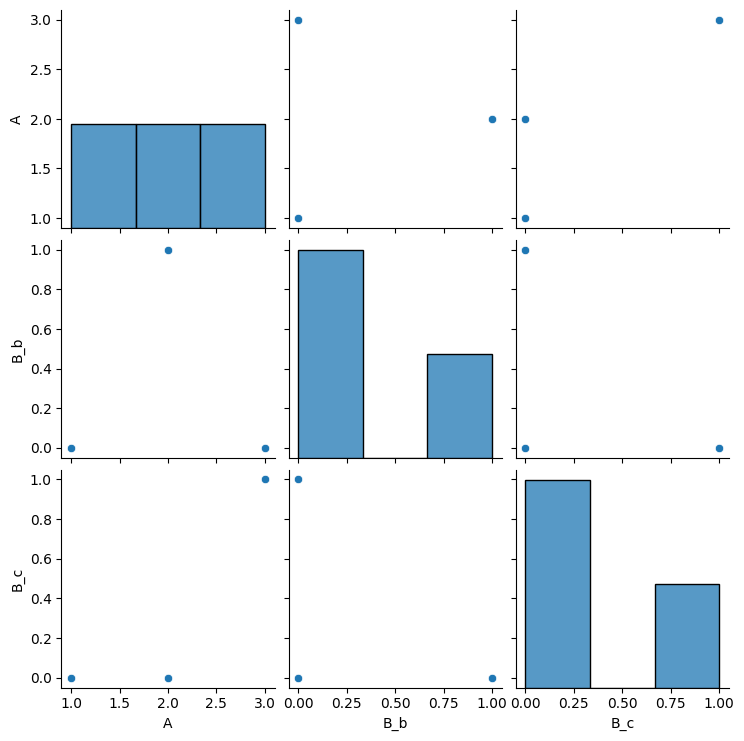

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of features
sns.pairplot(df) # Removed hue argument as 'Purchase_History' does not exist.
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Logistic Regression Classifier:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

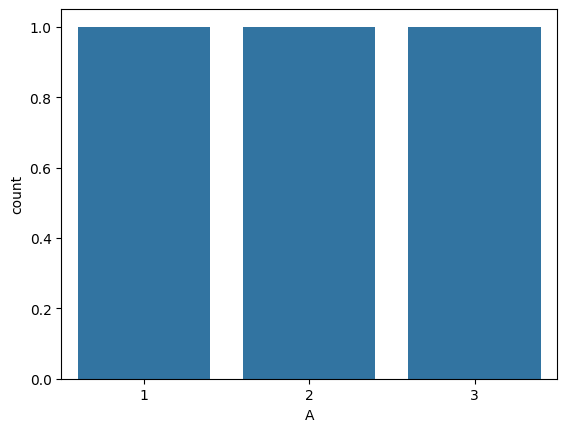

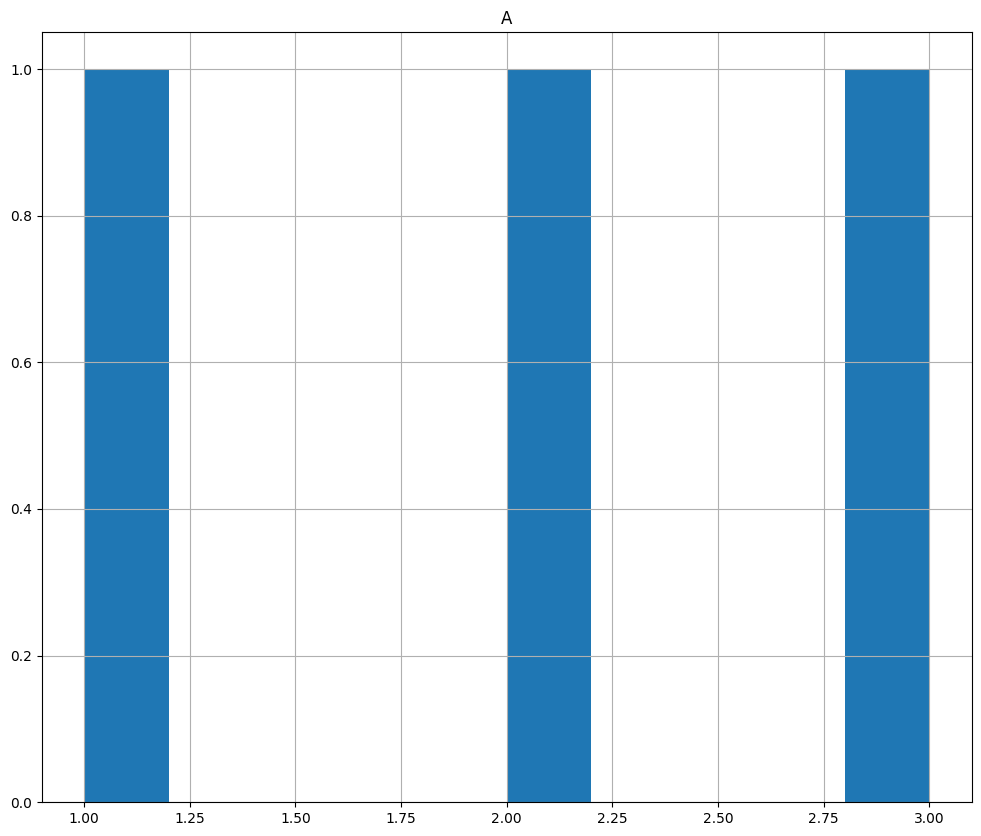

In [32]:
# Distribution of Target variable

# Check for typos and correct the column name if needed.
# If you intended to use a different DataFrame, replace 'df' accordingly.
sns.countplot(x='A', data=df)
plt.show()

# Features
df.hist(figsize=(12, 10))
plt.show()

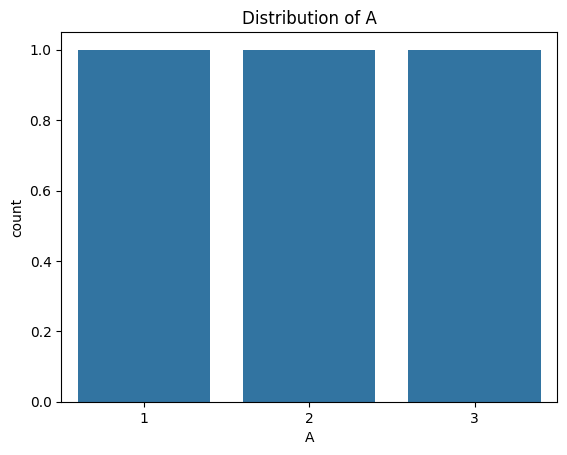

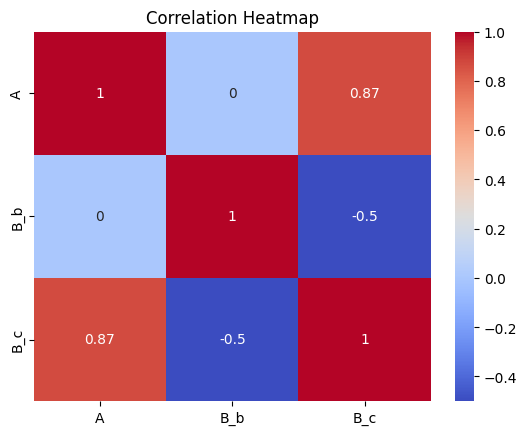

In [34]:
# Distribution target variable
sns.countplot(x='A', data=df) # Changed 'Purchase_History' to 'A' as it is present in the DataFrame.
plt.title('Distribution of A') # Changed the title to reflect the correct column name.
plt.show()

#  correlation heatmap understand relationships between features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

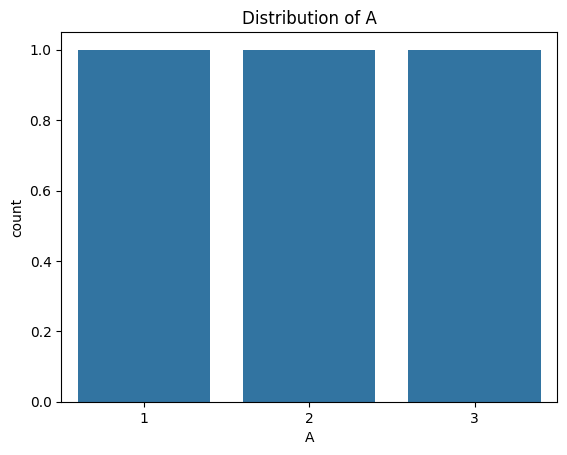

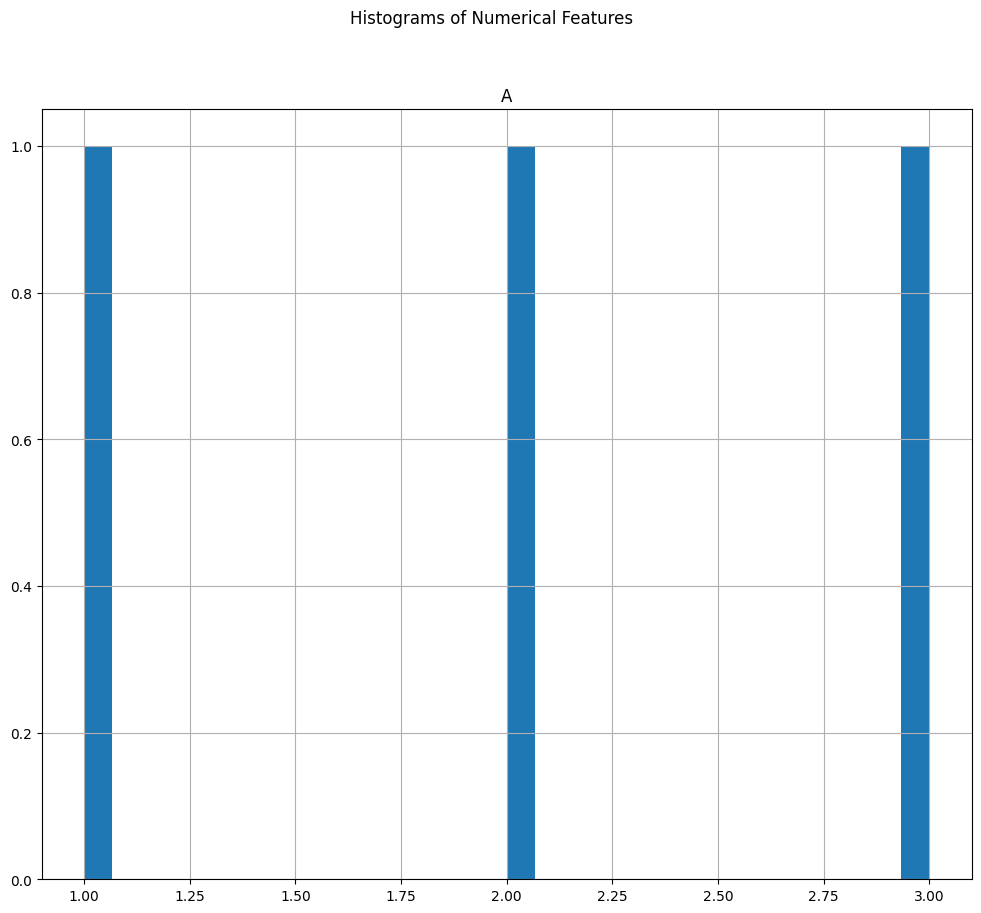

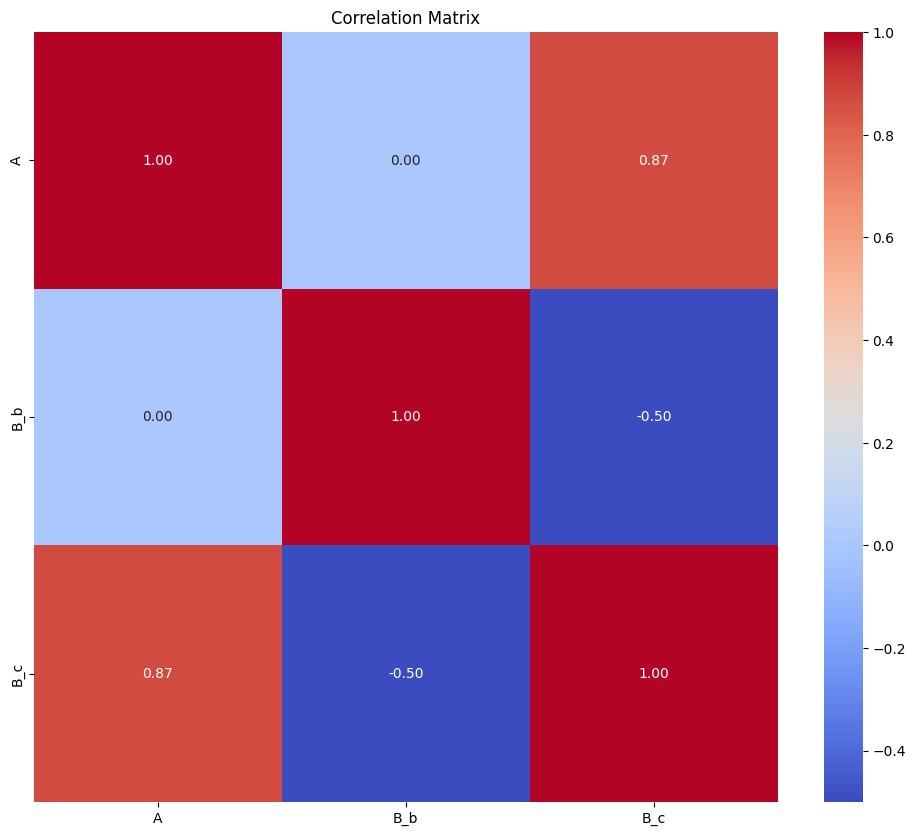

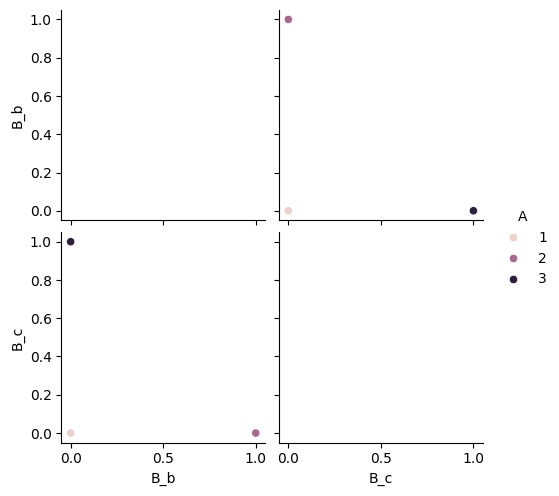

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
# Changed 'Purchase_History' to 'A'
sns.countplot(x='A', data=df)
plt.title('Distribution of A') # Changed the title to reflect the correct column name
plt.show()

# Distribution of numerical features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for a subset of features
subset_features = ['A', 'B_b', 'B_c']  # Replace with actual feature names
sns.pairplot(df[subset_features], hue='A') # Changed hue to 'A'
plt.show()

         A
count  3.0
mean   2.0
std    1.0
min    1.0
25%    1.5
50%    2.0
75%    2.5
max    3.0


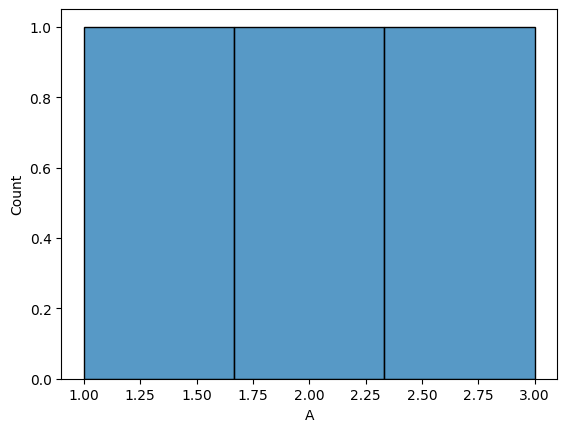

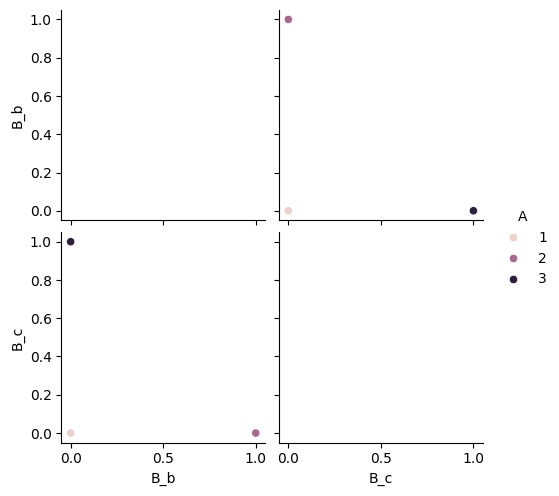

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Describe numerical features
print(df.describe())

# Visualize distributions
# Changed 'Purchase_History' to 'A' as it is present in the DataFrame.
sns.histplot(df['A'])
plt.show()

# Pairplot to visualize relationships
# Changed 'Purchase_History' to 'A'
sns.pairplot(df, hue='A')
plt.show()

In [42]:
import os

# Print the current working directory
print(os.getcwd())

# Change the current working directory (if needed)
# os.chdir('/path/to/your/directory')

/content


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier()

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, logreg_preds))
print("Random Forest:")
print(classification_report(y_test, rf_preds))


Logistic Regression:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Random Forest:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [54]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Use LeaveOneOut for very small datasets
from sklearn.model_selection import LeaveOneOut
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=LeaveOneOut(), n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'n_estimators': 50}
